In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data_cleaned.csv",index_col=0)

In [3]:
df.shape

(1338, 271)

In [4]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.235294,0.150685,0.033420,0.625,0.428571,0.946154,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.240644
1,0.000000,0.202055,0.038795,0.500,0.857143,0.738462,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.203128
2,0.235294,0.160959,0.046507,0.625,0.428571,0.930769,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.261487
3,0.294118,0.133562,0.038561,0.625,0.428571,0.269231,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.145464
4,0.235294,0.215753,0.060576,0.750,0.428571,0.923077,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.298308


In [5]:
columns = list(df.columns)

In [6]:
columns.index("SalePrice")

270

In [7]:
X = df.iloc[:,:-1]

In [8]:
y = df.SalePrice

In [9]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.625,0.428571,0.946154,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.500,0.857143,0.738462,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.625,0.428571,0.930769,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.625,0.428571,0.269231,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.750,0.428571,0.923077,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
y.head()

0    0.240644
1    0.203128
2    0.261487
3    0.145464
4    0.298308
Name: SalePrice, dtype: float64

## Splitting the data into test and train

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 40,
                                                test_size=0.2)

In [13]:
X_train.shape

(1070, 270)

In [14]:
X_test.shape

(268, 270)

# Model Creation

# 1 )Regression using xgboost

##### xgboost has benefit of both gradient boost and random forest (row sampling and column sampling)

In [252]:
from xgboost import XGBRegressor

In [253]:
model = XGBRegressor(base_score=0.455,learning_rate=0.4)

In [254]:
model.fit(X_train,y_train,verbose=True)

XGBRegressor(base_score=0.455, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Testing

In [255]:
y_pred = model.predict(X_test)

# Evaluation 

In [256]:
from sklearn.metrics import r2_score, mean_squared_error

In [257]:
r2_score(y_test,y_pred)

0.8242813354689404

In [258]:
mean_squared_error(y_test,y_pred)

0.002140520269119578

In [170]:
import seaborn as sns

C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

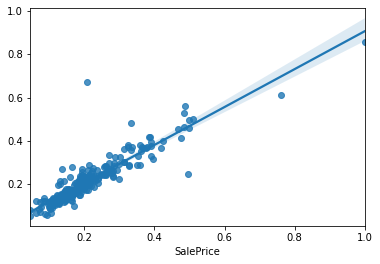

In [171]:
sns.regplot(y_test,y_pred)

# 2) using GradientBoostingRegressor

In [221]:
from sklearn.ensemble import GradientBoostingRegressor

In [222]:
model = GradientBoostingRegressor(learning_rate=0.3)

In [223]:
model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.3)

In [224]:
# Evaluation 

In [225]:
y_pred = model.predict(X_test)

In [226]:
r2_score(y_test,y_pred)

0.8840448416651467

In [227]:
mean_squared_error(y_test,y_pred)

0.0014125099765987094

C:\Users\Shivah Sae\.conda\envs\ai\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

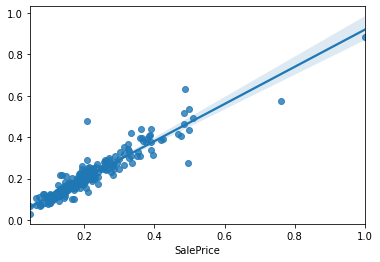

In [228]:
sns.regplot(y_test,y_pred)

# 3) using support vector

In [229]:
from sklearn.svm import SVR

In [230]:
from sklearn.model_selection import GridSearchCV

In [231]:
svr = SVR()

In [232]:
params = {'kernel':['rbf','poly','linear'],
          'degree':[3,4,5],
          'C':[0.5,1,5]}

In [233]:
gscv = GridSearchCV(svr, params, cv=5, scoring='neg_mean_absolute_error')

In [238]:
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.5, 1, 5], 'degree': [3, 4, 5],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='neg_mean_absolute_error')

In [239]:
y_pred = gscv.predict(X_test)

In [240]:
mean_squared_error(y_test,y_pred)

0.004067642572434123

In [241]:
r2_score(y_test,y_pred)

0.6660808444893646

# Conclusions

### Gradient Boost and Xtreme Gradient boost are working better for this data with r2_score of 0.88